| Epoch [0] | Step [1] | lr [0.200000] | Loss: [0.6934] | Acc: [0.5000] | Time: 0.2s
| Epoch [0] | Step [2] | lr [0.200000] | Loss: [2.5251] | Acc: [0.4785] | Time: 0.3s
| Epoch [0] | Step [3] | lr [0.200000] | Loss: [2.5478] | Acc: [0.5000] | Time: 0.4s
| Epoch [0] | Step [4] | lr [0.200000] | Loss: [7.4922] | Acc: [0.3906] | Time: 0.4s
| Epoch [0] | Step [5] | lr [0.200000] | Loss: [0.9069] | Acc: [0.4062] | Time: 0.4s
| Epoch [0] | Step [6] | lr [0.200000] | Loss: [2.2549] | Acc: [0.5781] | Time: 0.3s
| Epoch [0] | Step [7] | lr [0.200000] | Loss: [0.7040] | Acc: [0.5312] | Time: 0.3s
| Epoch [0] | Step [8] | lr [0.200000] | Loss: [0.7172] | Acc: [0.4688] | Time: 0.3s
| Epoch [0] | Step [9] | lr [0.200000] | Loss: [0.7683] | Acc: [0.5000] | Time: 0.3s
| Epoch [0] | Step [10] | lr [0.200000] | Loss: [0.8214] | Acc: [0.4844] | Time: 0.3s


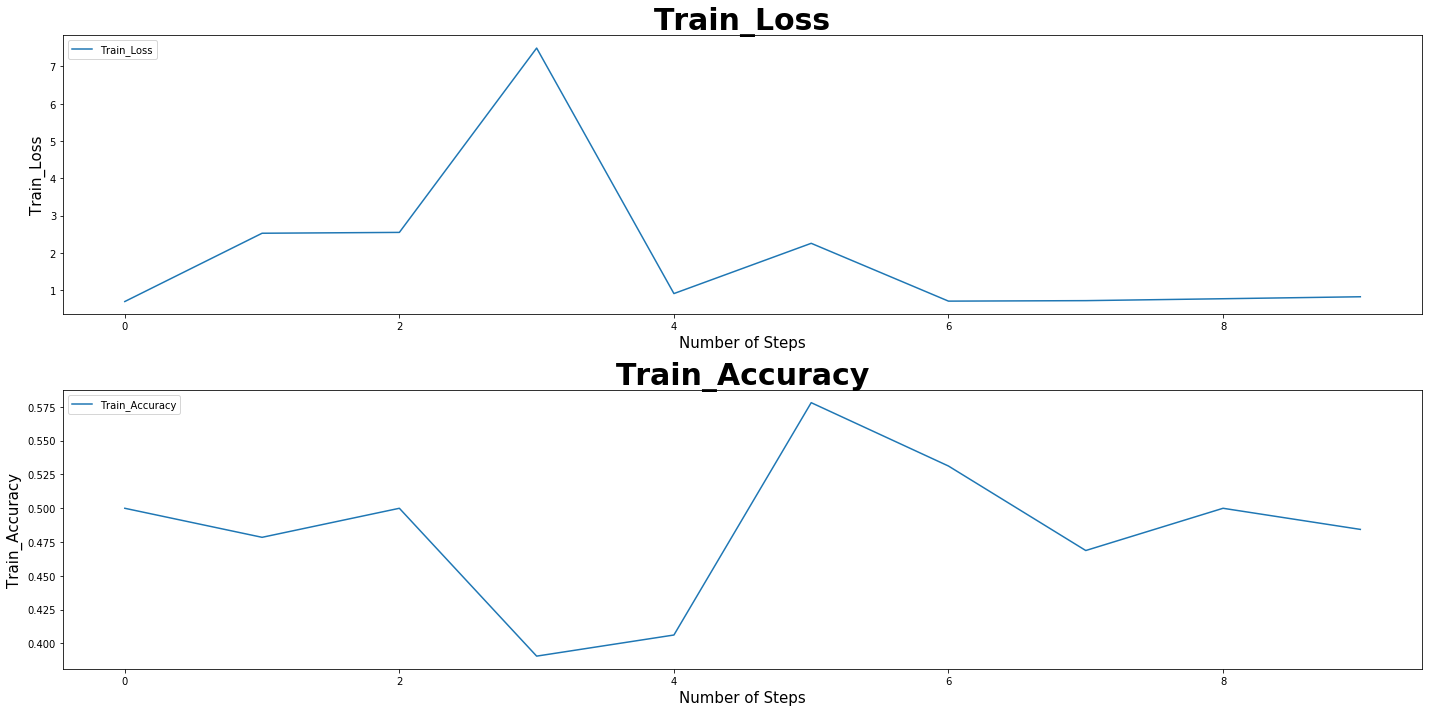

| Epoch [0] | Step [11] | lr [0.200000] | Loss: [0.8208] | Acc: [0.5312] | Time: 0.3s
| Epoch [0] | Step [12] | lr [0.200000] | Loss: [0.7344] | Acc: [0.5469] | Time: 0.3s
| Epoch [0] | Step [13] | lr [0.200000] | Loss: [0.7569] | Acc: [0.3906] | Time: 0.3s
| Epoch [0] | Step [14] | lr [0.200000] | Loss: [0.9304] | Acc: [0.4688] | Time: 0.3s
| Epoch [0] | Step [15] | lr [0.200000] | Loss: [0.9216] | Acc: [0.4375] | Time: 0.3s
| Epoch [0] | Step [16] | lr [0.200000] | Loss: [0.8099] | Acc: [0.5469] | Time: 0.3s
| Epoch [0] | Step [17] | lr [0.200000] | Loss: [0.6870] | Acc: [0.5625] | Time: 0.3s
| Epoch [0] | Step [18] | lr [0.200000] | Loss: [0.7196] | Acc: [0.3594] | Time: 0.3s
| Epoch [0] | Step [19] | lr [0.200000] | Loss: [0.9210] | Acc: [0.4219] | Time: 0.3s
| Epoch [0] | Step [20] | lr [0.200000] | Loss: [0.9280] | Acc: [0.4062] | Time: 0.3s


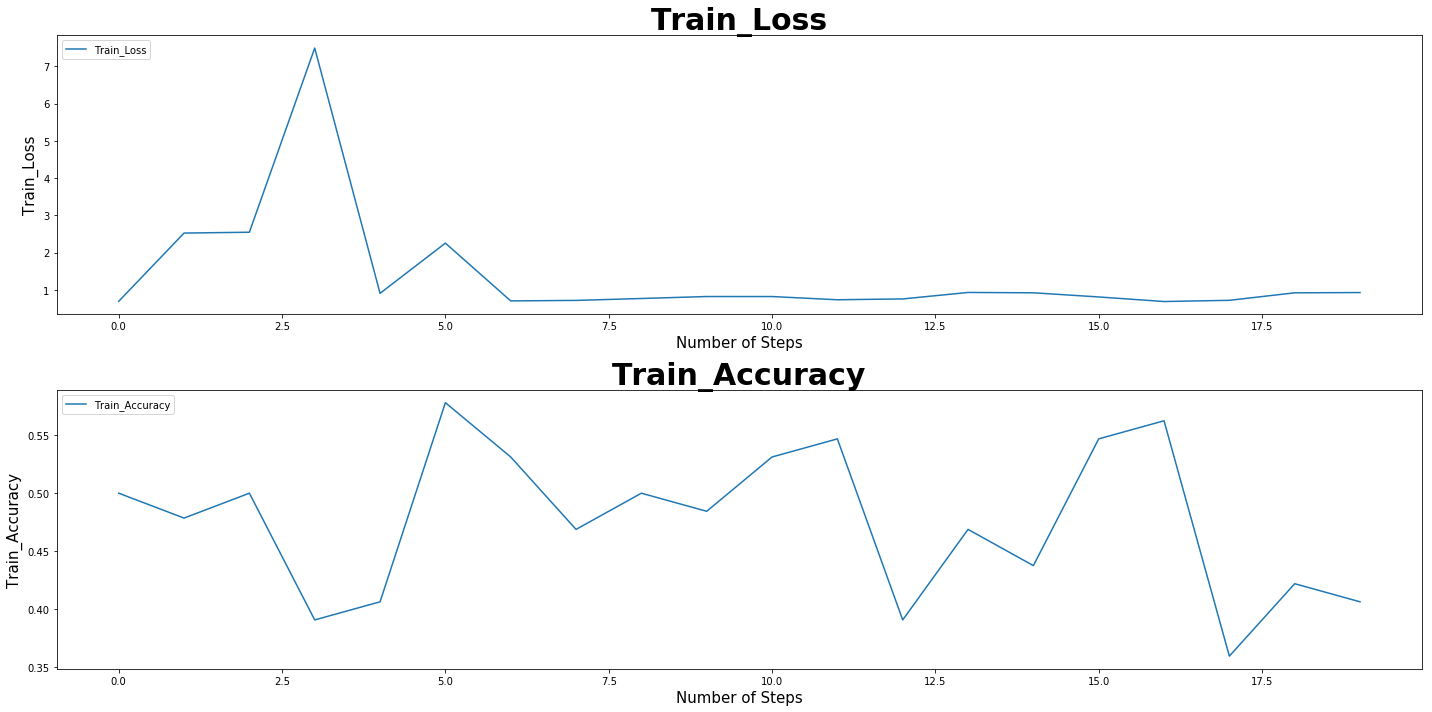

| Epoch [0] | Validation | Step [20] |  Loss: [0.8624] | Acc: [0.4688] | Time: 0.1s
| Epoch [0] | Validation | Step [20] |  Loss: [0.8389] | Acc: [0.4844] | Time: 0.1s
| Epoch [0] | Validation | Step [20] |  Loss: [0.8791] | Acc: [0.4531] | Time: 0.1s


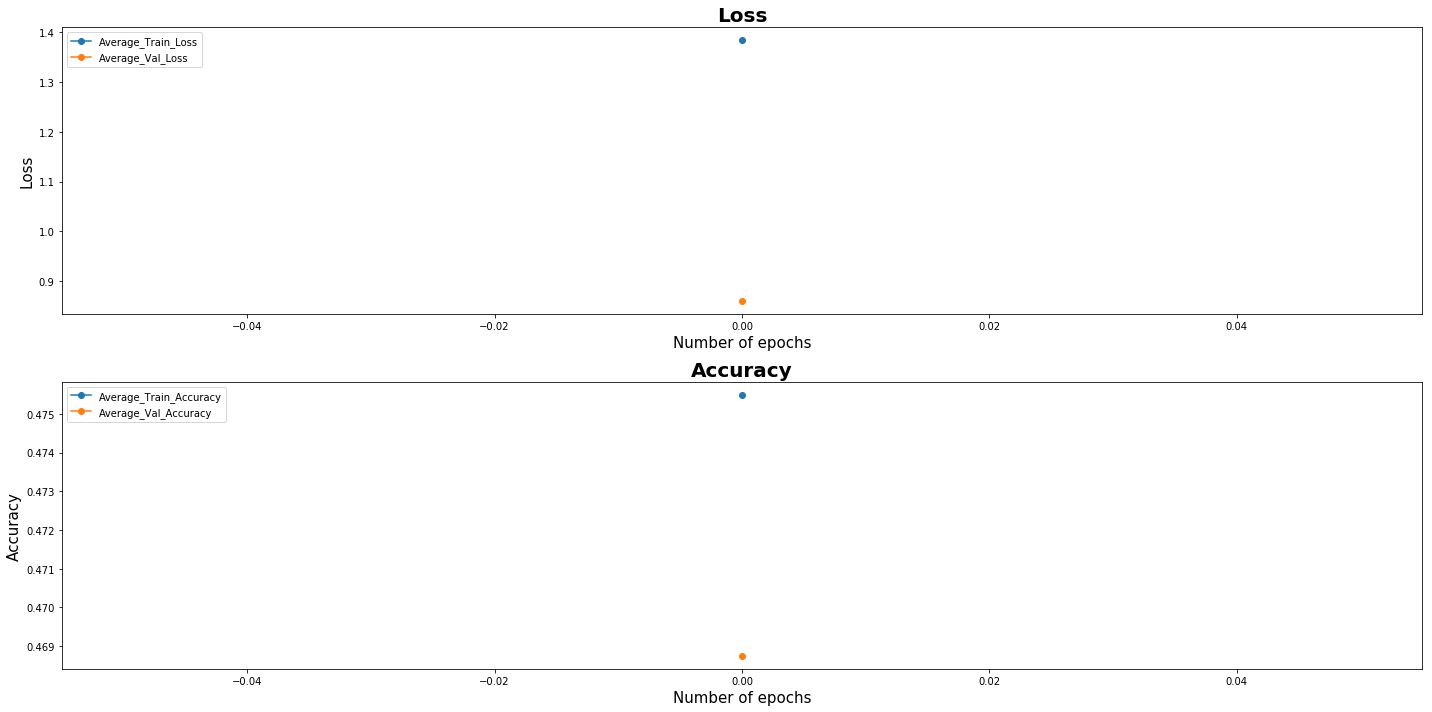

| Epoch [0] | Step [21] | lr [0.200000] | Loss: [0.8626] | Acc: [0.4688] | Time: 0.2s
| Epoch [0] | Step [22] | lr [0.200000] | Loss: [0.7299] | Acc: [0.5156] | Time: 0.3s
| Epoch [0] | Step [23] | lr [0.200000] | Loss: [0.6918] | Acc: [0.5312] | Time: 0.3s
| Epoch [0] | Step [24] | lr [0.200000] | Loss: [0.6985] | Acc: [0.4531] | Time: 0.2s
| Epoch [0] | Step [25] | lr [0.200000] | Loss: [0.6912] | Acc: [0.5469] | Time: 0.2s
Model Saved
| Epoch [1] | Step [26] | lr [0.200000] | Loss: [0.7314] | Acc: [0.5000] | Time: 0.5s
| Epoch [1] | Step [27] | lr [0.200000] | Loss: [0.7190] | Acc: [0.4375] | Time: 0.4s
| Epoch [1] | Step [28] | lr [0.200000] | Loss: [0.7242] | Acc: [0.5000] | Time: 0.4s
| Epoch [1] | Step [29] | lr [0.200000] | Loss: [0.6742] | Acc: [0.6094] | Time: 0.4s
| Epoch [1] | Step [30] | lr [0.200000] | Loss: [0.7806] | Acc: [0.4062] | Time: 0.4s


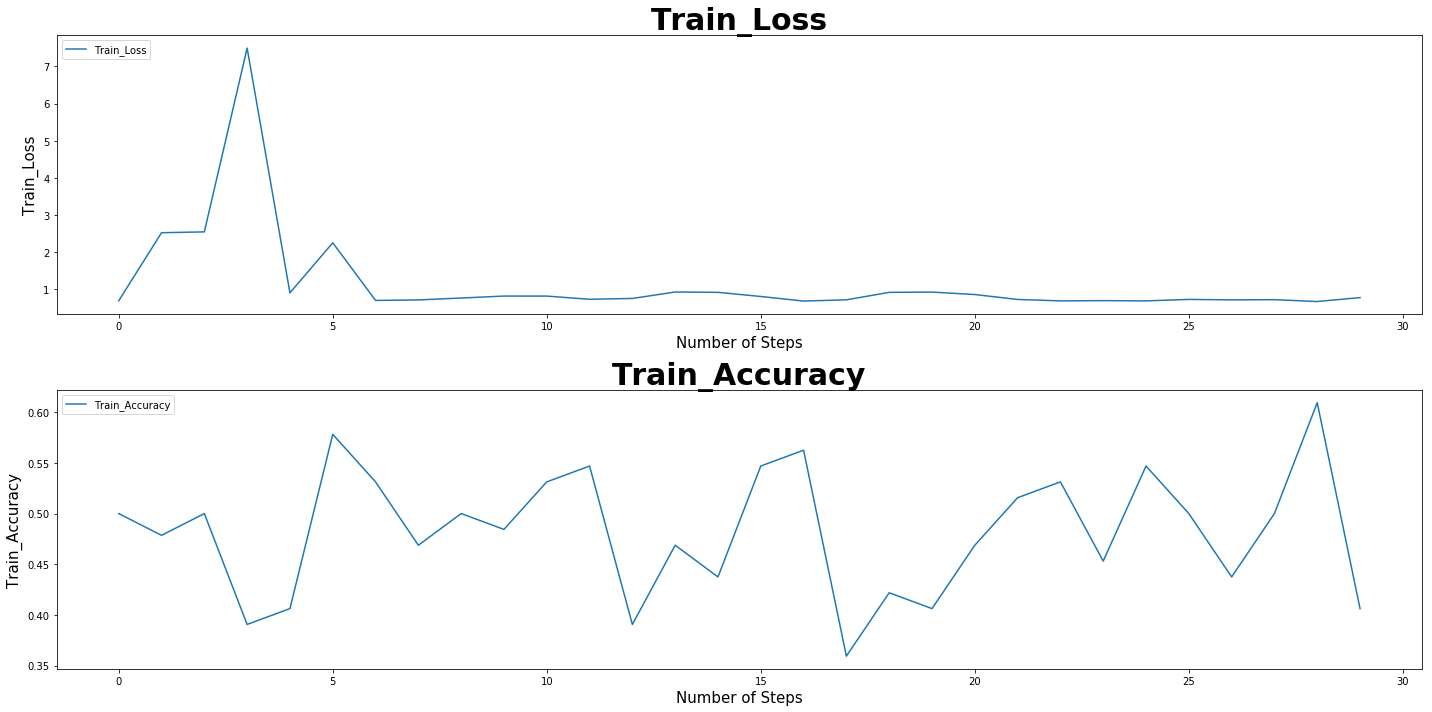

KeyboardInterrupt: 

In [22]:
import torch
import torch.nn as nn
# For the use of padding
from torch.nn.utils.rnn import pad_sequence, pad_packed_sequence, pack_padded_sequence
import torch.nn.functional as F
from torch.nn.utils import clip_grad_norm
from torch.utils.data import DataLoader
import torch.utils.data as Data
import torch.optim as optim
import torch.nn.functional as F
from torch.nn.parameter import Parameter

from copy import deepcopy
from nltk.tokenize import TweetTokenizer
import nltk
from urllib.parse import urlparse
import re
import itertools
import gensim
import os
from nltk.corpus import wordnet as wn  # For WordNet
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from sklearn.model_selection import train_test_split
from collections import defaultdict
import time
import pandas as pd

%matplotlib inline

'''
TODO:

1. BatchNorm
2. Large Batch size
3. Try Adam
4. Try more data
5.

'''


device = torch.device('gpu' if torch.cuda.is_available() else 'cpu')


class args(object):

    # Data

    dataset_path = ""  # load a dataset and setting
    seq_len = 20

    # Arch

    usingPretrainedEmbedding = False
    if usingPretrainedEmbedding:
        embedding_dim = 300
    else:
        embedding_dim = 500

    RNN_hidden = 128
    num_CNN_filter = 54
    CNN_kernel_size = 5
    LSTM_dropout = 0.1

    # Training params

    batch_size = 64
    L2 = 0
    threshold = 0.5
    lr = 0.2
    n_epoch = 3

    # If using Adam
    adam_beta1 = 0.9
    adam_beta2 = 0.999
    adam_weight_decay = 0.01

    # Logging the Training
    val_freq = 20
    val_steps = 3
    log_freq = 10
    model_save_freq = 1
    model_name = 'SSCL'
    model_path = './' + model_name + '/Model/'
    log_path = './' + model_name + '/Log/'


# Create the path for saving model and the log
if not os.path.exists(args.model_path):
    os.makedirs(args.model_path)

if not os.path.exists(args.log_path):
    os.makedirs(args.log_path)


class Constants():
    ''' The Constants for the text '''
    PAD = 0
    UNK = 1
    SOS = 2
    EOS = 3

    PAD_WORD = '<PAD>'
    UNK_WORD = '<UNK>'
    SOS_WORD = '<SOS>'
    EOS_WORD = '<EOS>'


specialTokens = {
    Constants.PAD_WORD: Constants.PAD,
    Constants.UNK_WORD: Constants.UNK,
    Constants.SOS_WORD: Constants.SOS,
    Constants.EOS_WORD: Constants.EOS,
}

specialTokenList = [Constants.PAD_WORD,
                    Constants.UNK_WORD,
                    Constants.SOS_WORD,
                    Constants.EOS_WORD]


# Load Google's pre-trained Word2Vec model.
# model = gensim.models.KeyedVectors.load_word2vec_format(
#     './GoogleNews-vectors-negative300.bin', binary=True)

# word2vector = torch.FloatTensor(model.vectors)


class SSCL(nn.Module):

    ''' The Model from paper '''

    def __init__(self,):
        super(SSCL, self).__init__()

        if args.usingPretrainedEmbedding:
            self.embed = nn.Embedding.from_pretrained(word2vector)
        else:
            self.embed = nn.Embedding(
                args.vocab_size, args.embedding_dim, Constants.PAD)

        self.cnn = nn.Sequential(
            nn.Conv1d(args.embedding_dim, args.num_CNN_filter,
                      args.CNN_kernel_size, 1, 2),
            nn.ReLU(inplace=True),
        )

        self.rnn = nn.LSTM(args.num_CNN_filter, args.RNN_hidden,
                           batch_first=True, dropout=args.LSTM_dropout)

        self.out_net = nn.Sequential(
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

        self.h0 = nn.Parameter(torch.randn(1, args.RNN_hidden))
        self.c0 = nn.Parameter(torch.randn(1, args.RNN_hidden))

#         self.apply(self.weight_init)

    def forward(self, input, lengths=None):

        B = input.size(0)

        emb_out = self.embed(input).transpose(1, 2)

        out = self.cnn(emb_out).transpose(1, 2)

        if not lengths is None:
            out = pack_padded_sequence(out, lengths, batch_first=True)
            out, hidden = self.rnn(
                out, (self.h0.repeat(1, B, 1), self.c0.repeat(1, B, 1)))
            out = pad_packed_sequence(out, batch_first=True)[0][:, -1, :]
        else:
            #             out = self.rnn(out,(self.h0.repeat(1,B,1), self.c0.repeat(1,B,1)))[0][:, -1, :]
            out = self.rnn(out)[0][:, -1, :]

        out = self.out_net(out)

        return out

    def weight_init(self, m):

        if type(m) in [nn.Conv2d, nn.ConvTranspose2d, nn.Linear]:
            nn.init.kaiming_normal_(m.weight, 0.2, nonlinearity='leaky_relu')
        elif type(m) in [nn.LSTM]:
            for name, value in m.named_parameters():
                if 'weight' in name:
                    nn.init.xavier_normal_(value.data)
                if 'bias'in name:
                    value.data.normal_()


# We can put all the lost function and the optimization into the args

class Trainer(nn.Module):

    def __init__(self,):
        super(Trainer, self).__init__()
        self.SSCL = SSCL()
        self.optim = optim.Adagrad(
            self.SSCL.parameters(), lr=args.lr, weight_decay=args.L2)
        self.Loss = nn.BCELoss()
        self.hist = defaultdict(list)

    def forward(self, input, label):

        if type(input) is tuple:
            input, lengths = input
        else:
            lengths = None

        self.pred = self.SSCL(input, lengths)

        loss = self.Loss(self.pred, label)

        accuracy = torch.mean(
            ((self.pred > args.threshold) == label.byte()).float())

        return loss, accuracy

    def train_step(self, input, label):

        self.optim.zero_grad()

        self.loss, self.accuracy = self.forward(input, label)

        self.hist["Temp_Train_Loss"].append(self.loss.item())
        self.hist["Temp_Train_Accuracy"].append(self.accuracy.item())
        self.hist["Train_Loss"].append(self.loss.item())
        self.hist["Train_Accuracy"].append(self.accuracy.item())

        self.loss.backward()
        self.optim.step()

    def test_step(self, input, label, validation=True):

        # Not Updating the weight

        self.loss, self.accuracy = self.forward(input, label)

        if validation:
            self.hist["Temp_Val_Loss"].append(self.loss.item())
            self.hist["Temp_Val_Accuracy"].append(self.accuracy.item())
            self.hist["Val_Loss"].append(self.loss.item())
            self.hist["Val_Accuracy"].append(self.accuracy.item())
        else:
            self.hist["Temp_Test_Loss"].append(self.loss.item())
            self.hist["Temp_Test_Accuracy"].append(self.accuracy.item())
            self.hist["Test_Loss"].append(self.loss.item())
            self.hist["Test_Accuracy"].append(self.accuracy.item())

    def calculateAverage(self,):

        temp_keys = deepcopy(list(trainer.hist.keys()))
        for name in temp_keys:
            if 'Temp' in name:
                self.hist["Average" + name[4:]
                          ].append(sum(self.hist[name])/len(self.hist[name]))
                self.hist[name] = []

    def plot_train_hist(self, step):
        fig = plt.figure(figsize=(20, 10))
        num_loss = 2
        i = 0
        for name in self.hist.keys():
            if 'Train' in name and not "Temp" in name and not "Average" in name:
                i += 1
                fig.add_subplot(num_loss, 1, i)
                plt.plot(self.hist[name], label=name)
                plt.xlabel('Number of Steps', fontsize=15)
                plt.ylabel(name, fontsize=15)
                plt.title(name, fontsize=30, fontweight="bold")
                plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()
        fig.savefig("Train_Loss&Acc_Hist"+str(step)+".png")

    def plot_all(self, step=None):
        fig = plt.figure(figsize=(20, 10))
        for name in self.hist.keys():
            if "Average" in name:
                if 'Loss' in name:
                    plt.subplot(211)
                    plt.plot(self.hist[name], marker='o', label=name)
                    plt.ylabel('Loss', fontsize=15)
                    plt.xlabel('Number of epochs', fontsize=15)
                    plt.title('Loss', fontsize=20, fontweight="bold")
                    plt.legend(loc='upper left')
                if "Accuracy" in name:
                    plt.subplot(212)
                    plt.plot(self.hist[name], marker='o', label=name)
                    plt.ylabel('Accuracy', fontsize=15)
                    plt.xlabel('Number of epochs', fontsize=15)
                    plt.title('Accuracy', fontsize=20, fontweight="bold")
                    plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()
        if step is not None:
            fig.savefig("All_Hist"+str(step)+".png")

    def model_save(self, step):

        path = args.model_path + args.model_name+'_Step_' + str(step) + '.pth'
        torch.save({args.model_name: self.state_dict()}, path)
        print('Model Saved')

    def load_step_dict(self, step):

        path = args.model_path + args.model_name + \
            '_Step_' + str(step) + '.pth'
        self.load_state_dict(torch.load(
            path, map_location=lambda storage, loc: storage)[args.model_name])
        print('Model Loaded')

    def num_all_params(self,):
        return sum([param.nelement() for param in self.parameters()])


df_noSPammer = pd.read_html('textMaliciousMark_Small_NotSpammer.html')
df_noSPammer = df_noSPammer[0][1:]
df_Spammer = pd.read_html('textMaliciousMark_Small_Spammer.html')
df_Spammer = df_Spammer[0][1:]
df = pd.concat([df_Spammer, df_noSPammer])
del df_noSPammer, df_Spammer

tknzr = TweetTokenizer()
ps = nltk.stem.PorterStemmer()


def preprocessingInputData(input):
    allText = [i for i in input]
    preprocessedText = [[ps.stem(word) for word in tknzr.tokenize(re.sub(r'\d+', '', re.sub(r"http\S+|www.\S+", lambda match: urlparse(match.group(
    )).netloc or match.group().split("/")[0], sentence)).lower()) if word not in nltk.corpus.stopwords.words('english') and len(word) >= 3] for sentence in allText]
    return preprocessedText


def mapFromWordToIdx(input):

    wholeText = []

    for s in input:
        sentence = [2]
        for w in s:
            if w in text.tokens:
                sentence.append(text.index(w))
            else:
                sentence.append(1)
        sentence.append(3)
        wholeText.append(sentence)

    return wholeText


def CreateDatatset(X, y):

    X_len = torch.tensor(list(map(len, X)))
    X_len, X_len_idx = X_len.sort(0, descending=True)

    X_ordered = [torch.LongTensor(X[i]) for i in X_len_idx]
    X_p = pad_sequence(X_ordered, batch_first=True)
    y = torch.FloatTensor(np.array(y))
    dataset = Data.TensorDataset(X_p, X_len, y)

    return dataset


X_train, X_test, Y_train, Y_test = train_test_split(
    df[0], df[1], test_size=0.2, random_state=64)
X_test, X_validation, Y_test, Y_validation = train_test_split(
    X_test, Y_test, test_size=0.5, random_state=64)
X_train = preprocessingInputData(X_train)
# Preparing the dictionary
text = nltk.Text(list(itertools.chain(*X_train)))
len(dict(text.vocab()))  # number of the vocab
text.tokens  # this is the idx -> word
text.index("t.co")  # this. is the word -> idx
text.tokens = specialTokenList + text.tokens
args.vocab_size = len(text.tokens)
training_dataset = CreateDatatset(
    mapFromWordToIdx(X_train), list(map(int, list(Y_train))))
X_validation = preprocessingInputData(X_validation)
validation_dataset = CreateDatatset(mapFromWordToIdx(
    X_validation), list(map(int, list(Y_validation))))
X_test = preprocessingInputData(X_test)
test_dataset = CreateDatatset(mapFromWordToIdx(
    X_test), list(map(int, list(Y_test))))

train_loader = DataLoader(
    training_dataset, batch_size=args.batch_size, shuffle=False, drop_last=False)
valid_loader = DataLoader(
    validation_dataset, batch_size=args.batch_size, shuffle=True, drop_last=False)


trainer = Trainer()

trainer.num_all_params()

scheduler = optim.lr_scheduler.StepLR(trainer.optim, 2000, gamma=0.7)
# trainer.optim.param_groups[0]['lr']=
allStep = 0
epoch = 0

while epoch < args.n_epoch:
    for i, (X, X_len, y) in enumerate(train_loader):
        trainer.train()
        X, X_len, y = X.to(device), X_len.to(device), y.to(device)
#         scheduler.step()
        start_t = time.time()
#         trainer.train_step((X, X_len), y)
        trainer.train_step(X, y)

        end_t = time.time()
        allStep += 1
        print('| Epoch [%d] | Step [%d] | lr [%.6f] | Loss: [%.4f] | Acc: [%.4f] | Time: %.1fs' %
              (epoch, allStep, trainer.optim.param_groups[0]['lr'], trainer.loss.item(), trainer.accuracy.item(),
               end_t - start_t))

#         if trainer.accuracy.item() > 0.95: # Stop early
#             raise StopIteration
        if allStep % args.log_freq == 0:
            trainer.plot_train_hist('_SSCL')

        if allStep % args.val_freq == 0:

            for _ in range(args.val_steps):
                trainer.eval()
                stIdx = np.random.randint(
                    0, len(validation_dataset) - args.batch_size)
                v_X, v_X_len, v_y = validation_dataset[stIdx: stIdx +
                                                       args.batch_size]
                v_X, v_X_len, v_y = v_X.to(
                    device), v_X_len.to(device), v_y.to(device)
                start_t = time.time()
#                 trainer.test_step((v_X, v_X_len), v_y)
                trainer.test_step(v_X, v_y)
                end_t = time.time()
                print('| Epoch [%d] | Validation | Step [%d] |  Loss: [%.4f] | Acc: [%.4f] | Time: %.1fs' %
                      (epoch, allStep, trainer.loss.item(), trainer.accuracy.item(), end_t - start_t))
            trainer.calculateAverage()
            trainer.plot_all('_SSCL')

     # After every Epoch, if can be moved

    epoch += 1
    trainer.model_save(epoch)

    if epoch >= 20:
        raise StopIteration


In [ ]:
text.